In [1]:
import numpy as np
import pandas as pd
import os
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import matplotlib.pylab as plt
%matplotlib inline

1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

### Define a function getNYCData to download data.
Referance: https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb

In [2]:
def getNYCData():
    """
    Download data from NYC Open Data 'nycb2010_16d' into PUIdata
    """
   
    ### First I will check that it is not already there
    if not os.path.isdir(os.getenv("PUIDATA") + "/" + "nycb2010_16d"):
        if os.path.isdir("nycb2010_16d"):
            # if in the current dir just move it
            if os.system("mv " + "nycb2010_16d " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the csv file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + "nycb2010_16d.zip"):
                if not os.path.isfile("nycb2010_16d.zip"):
                    print "Downloading"
                    os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + "nycb2010_16d.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            if not os.system("unzip " + os.getenv("PUIDATA") + "/" + "nycb2010_16d.zip"):
                if os.system("mv " + "nycb2010_16d " + os.getenv("PUIDATA")):
                    print ("Error moving file!, Please check!")
            ## NOTE: old csv citibike data had a different name structure. 
    
    ### One final check:
    if not os.path.isdir(os.getenv("PUIDATA") + "/" + "nycb2010_16d"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("Folder with required files in PUIdata, you can continue")

In [3]:
getNYCData()

Folder with required files in PUIdata, you can continue


In [4]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb


In [5]:
path = os.getenv('PUIDATA') +'/'+ "nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(path)
ct_shape.to_crs(epsg=4326, inplace=True)

In [6]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [7]:
ct_latlon = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_latlon.reset_index(inplace=True)
ct_latlon.drop('index', axis=1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
ct_latlon.head(15)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300315,..."
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...
5,30020001000,3,Brooklyn,1000,002000,203150.927230,2076.660170,POLYGON ((-74.01298705619368 40.64945600088912...
6,30022001000,3,Brooklyn,1000,002200,202989.817092,2080.720191,POLYGON ((-74.01925526318797 40.64685276173368...
7,30030001000,3,Brooklyn,1000,003000,2288.488412,251.742624,POLYGON ((-74.02626267406126 40.64009438137105...
8,30031001000,3,Brooklyn,1000,003100,214447.259568,1902.577167,POLYGON ((-73.97782679465359 40.69343813943177...
9,30033001000,3,Brooklyn,1000,003300,258228.648239,2448.507197,POLYGON ((-73.97510566428163 40.68969750920951...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [9]:
cusp = shapely.geometry.Point(-73.9866, 40.6931)

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

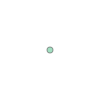

In [10]:
cusp

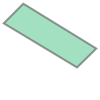

In [11]:
ct_latlon.geometry[0]

In [12]:
for i in range(len(ct_latlon)):
    #for ct in (ct_latlon.geometry):
        if ct_latlon.geometry[i].contains(cusp):
            print 'CUSP is contained in', ct_latlon.geometry[i]


CUSP is contained in POLYGON ((-73.98622595691906 40.69308831343839, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543156, -73.98725396415627 40.69312490276504, -73.98622595691906 40.69308831343839))


In [30]:
i

9681

In [34]:
ct_cusp = GeoDataFrame(ct_latlon.iloc[2554,:])

In [38]:
ct_cusp.T

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
2554,30011001008,3,Brooklyn,1008,001100,92776.3,1221.03,POLYGON ((-73.98622595691906 40.69308831343839...


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

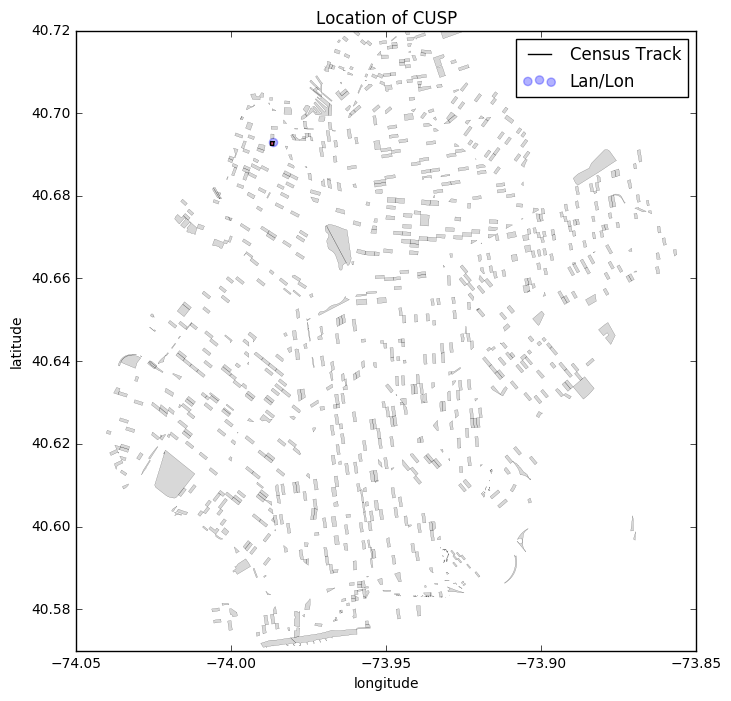

In [54]:
f, ax = plt.subplots(figsize = (8,8))
ct_latlon[::10].plot(ax=ax, color='grey', alpha=0.3, linewidth=0.1)
ct_cusp.T.plot(ax=ax, color='red',label='Census Track')
plt.scatter(cusp.x, cusp.y, color='blue', alpha=0.3, s=35, label='Lan/Lon')
plt.xlim(-74.05, -73.85)
plt.ylim(40.57, 40.72)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Location of CUSP')
plt.legend(loc='best')
plt.show()

### This fig shows the location of cusp where the blue point is plot by latitude and longitude, the red square is plot by the data from census track